## 2D Be lens with $R=50\mu$m - effective R calculation

created: **11/08/2022**; last edited: **11/08/2022**

[rafael.celestre@esrf.eu](mailto:rafael.celestre@esrf.eu)

<hr style="border:1px solid gray">

In [1]:
# imports

# checking we are using the correct python:
import sys
print(sys.executable)
print(sys.version)
sys.path.insert(0, '../../pylibs/')

%matplotlib notebook
import matplotlib.pylab as pl

from f_index_of_refraction import index_of_refraction

import barc4plots.barc4plots as b4pt         # get barc4plots: https://gitlab.esrf.fr/celestre/barc4plots
import barc4ro.projected_thickness as b4ro   # get barc4ro: https://github.com/oasys-kit/oasys-barc4ro
import barc4ro.barc4ro as b4RO

import numpy as np

/home/esrf/celestre/miniconda/envs/xog/bin/python
3.8.12 (default, Oct 12 2021, 13:49:34) 
[GCC 7.5.0]


In [2]:
# global variables

beamE = 17        # in keV
pix_size = 0.635  # in um
scan = [0, 1, 2, 3, 4, 6, 8, 10, 12]     # angles for the scan (degrees)
dpi = 250   # for plots

#### x-ray lens

In [3]:
# x-ray lens parameters in meters

mat = 'Be'
delta, beta, att_len = index_of_refraction(mat, beamE*1e3)

print('>>> %s: n = 1 - %.6e + i %.6e (att. length %.6e) at %.3f keV'%(mat, delta, beta, att_len, beamE))

R = 50e-6   # radius
L = 1e-3    # total thickness
wt = 35e-6  # wall thickness
A = 2*np.sqrt((L-wt)*R)  # geometric aperture
focal_plane = 3          # plane of focusing: 1- horizontal, 2- vertical, 3- both
nCRL = 1

# axis for lens calculations
d = 400
x = np.linspace(-d, d, int(2*d/pix_size)+1)*1e-6
y = x

>>> Be: n = 1 - 1.178476e-06 + i 2.360165e-10 (att. length 2.459037e-02) at 17.000 keV


In [4]:
# reading simulated data

grad = np.load('./results/2D_Be_R50um_hor_grad.npy')
axis = np.load('./results/2D_Be_R50um_ver_grad_axis.npy')

#### calculation of the local radius of curvature

>>>> file 2D_Be_R50um_hor_R_cut.png saved to disk.


<IPython.core.display.Javascript object>


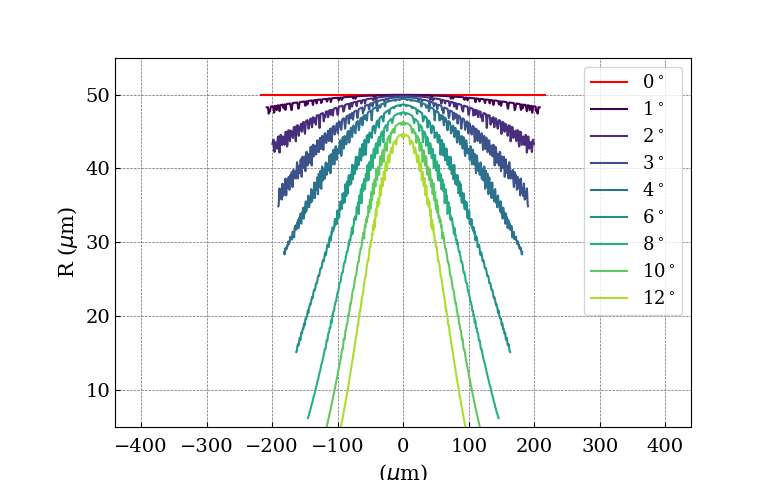

In [8]:
# gradient cleanup

colors = pl.cm.viridis(np.linspace(0,1,len(scan)))
deg = 15

for i in range(len(scan)):
    ax_max = np.argmax(grad[i, :])-1
    ax_min = np.argmin(grad[i, :])+1
    
    grad_cut = grad[i, :]
    
    grad_cut[axis<axis[ax_min]] = 0
    grad_cut[axis>axis[ax_max]] = 0
    grad_cut = np.trim_zeros(grad_cut)

    ax_cut = np.linspace(-len(grad_cut)/2, len(grad_cut)/2, len(grad_cut))*pix_size*1e-6
        
    p = np.polyfit(ax_cut, grad_cut, deg)
#     r_grad_cut = 0
    d_grad_cut = 0
    ctr = 0
    for j in range(len(p)):
#             r_grad_cut += p[j] * (ax_cut ** (deg-ctr))
            d_grad_cut += p[j] * (deg-ctr) * (ax_cut ** (deg-ctr-1))
            ctr += 1
#     image = b4pt.Image2Plot((2*delta/d_grad_cut)*1e6, ax_cut*1e6)
    local_radius = delta*2/np.gradient(grad_cut, (x[1] - x[0]))
    image = b4pt.Image2Plot((local_radius)*1e6, ax_cut*1e6)

    image.AspectRatio = False
    image.LaTex = True
    image.legends = ['', '($\mu$m)', 'R ($\mu$m)']
    image.LineStyle = '-'
    image.label = str(scan[i])+'$^\circ$'
    image.LabelPos = 1
    image.ax_limits = [-A*1e6, A*1e6, 5, 55]
    image.grid = True
    image.sort_class()
    if i == 0:
        image.ColorScheme = -2
        b4pt.plot_1D(image, Enable=False, Hold=False)
    elif i == len(scan)-1:
        image.ColorScheme = colors[i-1]
        b4pt.plot_1D(image, './results/2D_Be_R50um_hor_R_cut.png', Enable=True, Hold=True, dpi=dpi)
    else:
        image.ColorScheme = colors[i-1]
        b4pt.plot_1D(image, Enable=False, Hold=True)
            

#     debug:
#     image = b4pt.Image2Plot((grad_cut-r_grad_cut)*1e6, ax_cut*1e6)
#     image.AspectRatio = False
#     image.LaTex = True
#     image.legends = ['', '($\mu$m)', '($\mu$rad)']
#     image.LineStyle = '-'
#     image.label = str(scan[i])+'$^\circ$'
#     image.LabelPos = 1
#     image.ax_limits = [-A*1e6, A*1e6, -25/1000, 25/1000]
#     image.grid = True
#     image.sort_class()
#     if i == 0:
#         image.ColorScheme = -2
#         b4pt.plot_1D(image, Enable=False, Hold=False)
#     elif i == len(scan)-1:
#         image.ColorScheme = colors[i-1]
#         b4pt.plot_1D(image, Enable=True, Hold=True, dpi=dpi)
#     else:
#         image.ColorScheme = colors[i-1]
#         b4pt.plot_1D(image, Enable=False, Hold=True)


In [ ]:
# reading simulated data

grad = np.load('./results/2D_Be_R50um_ver_grad.npy')
axis = np.load('./results/2D_Be_R50um_ver_grad_axis.npy')

In [ ]:
# gradient cleanup

colors = pl.cm.viridis(np.linspace(0,1,len(scan)))
deg = 15

for i in range(len(scan)):
    ax_max = np.argmax(grad[i, :])-1
    ax_min = np.argmin(grad[i, :])+1
    
    grad_cut = grad[i, :]
    
    grad_cut[axis<axis[ax_min]] = 0
    grad_cut[axis>axis[ax_max]] = 0
    grad_cut = np.trim_zeros(grad_cut)

    ax_cut = np.linspace(-len(grad_cut)/2, len(grad_cut)/2, len(grad_cut))*pix_size*1e-6
        
    p = np.polyfit(ax_cut, grad_cut, deg)
#     r_grad_cut = 0
    d_grad_cut = 0
    ctr = 0
    for j in range(len(p)):
#             r_grad_cut += p[j] * (ax_cut ** (deg-ctr))
            d_grad_cut += p[j] * (deg-ctr) * (ax_cut ** (deg-ctr-1))
            ctr += 1
            
    image = b4pt.Image2Plot((2*delta/d_grad_cut)*1e6, ax_cut*1e6)
    image.AspectRatio = False
    image.LaTex = True
    image.legends = ['', '($\mu$m)', 'R ($\mu$m)']
    image.LineStyle = '-'
    image.label = str(scan[i])+'$^\circ$'
    image.LabelPos = 1
    image.ax_limits = [-A*1e6, A*1e6, 5, 55]
    image.grid = True
    image.sort_class()
    if i == 0:
        image.ColorScheme = -2
        b4pt.plot_1D(image, Enable=False, Hold=False)
    elif i == len(scan)-1:
        image.ColorScheme = colors[i-1]
        b4pt.plot_1D(image, './results/2D_Be_R50um_ver_R_cut.png', Enable=True, Hold=True, dpi=dpi)
    else:
        image.ColorScheme = colors[i-1]
        b4pt.plot_1D(image, Enable=False, Hold=True)
            

#     debug:
#     image = b4pt.Image2Plot((grad_cut-r_grad_cut)*1e6, ax_cut*1e6)
#     image.AspectRatio = False
#     image.LaTex = True
#     image.legends = ['', '($\mu$m)', '($\mu$rad)']
#     image.LineStyle = '-'
#     image.label = str(scan[i])+'$^\circ$'
#     image.LabelPos = 1
#     image.ax_limits = [-A*1e6, A*1e6, -25/1000, 25/1000]
#     image.grid = True
#     image.sort_class()
#     if i == 0:
#         image.ColorScheme = -2
#         b4pt.plot_1D(image, Enable=False, Hold=False)
#     elif i == len(scan)-1:
#         image.ColorScheme = colors[i-1]
#         b4pt.plot_1D(image, Enable=True, Hold=True, dpi=dpi)
#     else:
#         image.ColorScheme = colors[i-1]
#         b4pt.plot_1D(image, Enable=False, Hold=True)
